### Credit Card Data Clustering Analysis

Dataset: Activity of credit card users

Data from Kaggle: https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis/data

Steps: data preprocessing, 4 clustering algorithms, comparison of assessment metrics, application of K-means (6 clusters) and analysis of results. 

Author: Elena Lopez

### Import packages


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.metrics import silhouette_score


from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
import os
from pathlib import Path
import missingno as msno #for viz to treat missing values
from datetime import timedelta
import matplotlib as mpl


warnings.filterwarnings('ignore')

In [2]:
#Check current directory
os.getcwd()

#Change directory
os.chdir('/Users/elenalopez/Desktop/Projects/Python/Clustering')
os.getcwd()

#Check datasets
path= Path()
for i in path.glob("*"):
    print(i)

datasets_14701_19663_CC GENERAL.csv
Clustering_ML.ipynb
.ipynb_checkpoints


### Import dataset

In [3]:

df = pd.read_csv("datasets_14701_19663_CC GENERAL.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print(f"The dataset has {df.shape[1]} columns and {df.shape[0]} rows")
print(f"The dataset has {df.isnull().any().sum()} missing values")

The dataset has 18 columns and 8950 rows
The dataset has 2 missing values


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


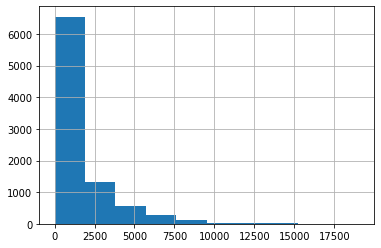

In [6]:
#Exploring balance

df.BALANCE.hist()

### Data cleaning

In [7]:
# Is CUST_ID the index column? -- yes.

print(df.CUST_ID.nunique()) 
df.CUST_ID.count()

8950


8950

#### Missing values

In [8]:
# Check if missing values and fill them with appropriate method.
def na_values(dataset):
    df_na = pd.DataFrame(df.isnull().sum()).rename(columns={0: "Missing_values"})
    df_na["Percentage(%)"]= round((df_na.iloc[:,0] / df.count()) * 100,3)
    return df_na[df_na.Missing_values > 0].sort_values("Missing_values", ascending=False)

na_values(df)

,Missing_values,Percentage(%)
MINIMUM_PAYMENTS,313,3.624
CREDIT_LIMIT,1,0.011


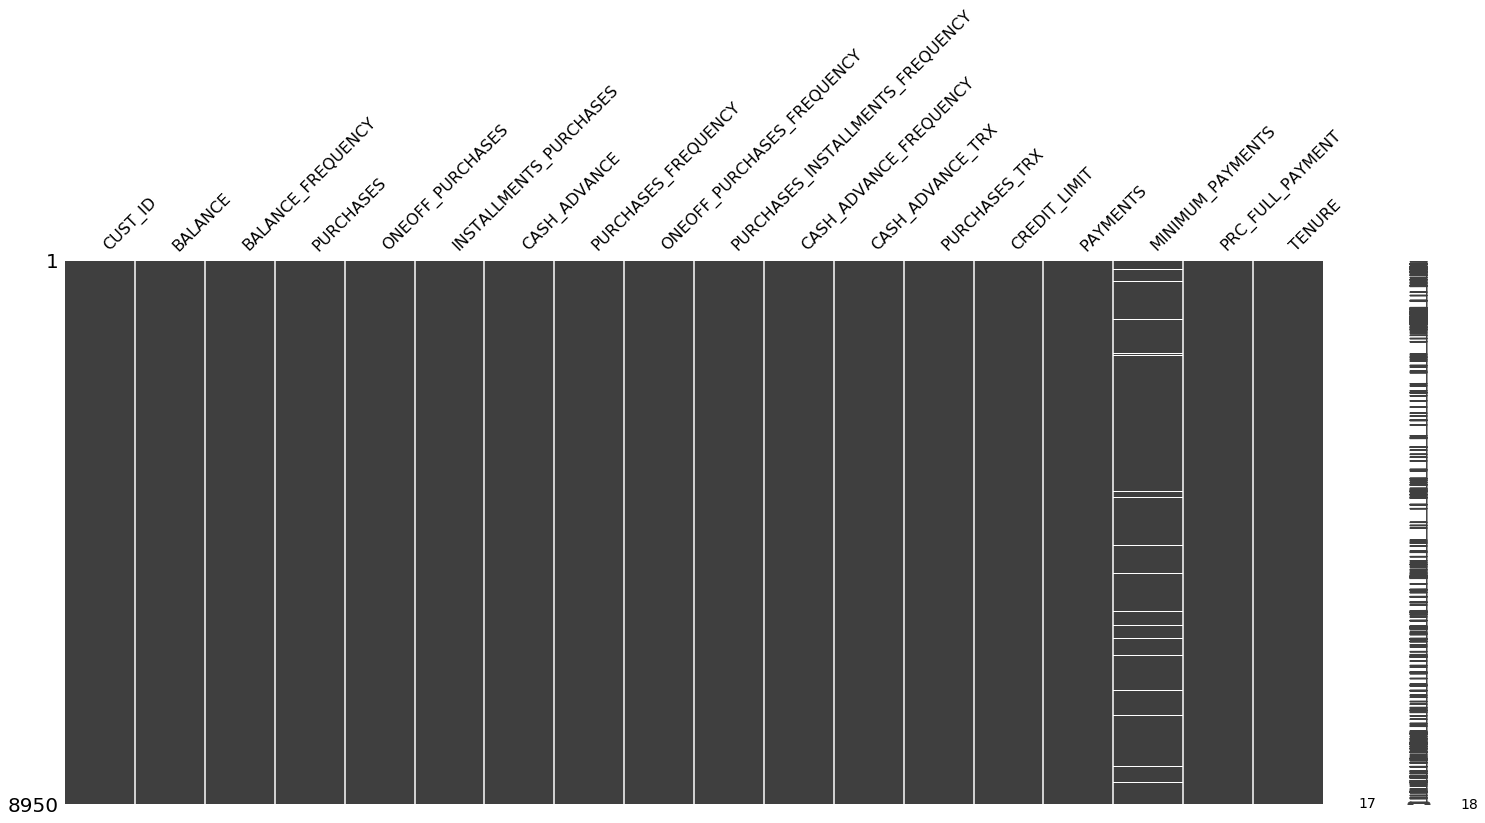

In [9]:
#Nullity matrix -- to check if the columns with NAs are correlated or missing is completely at random 
msno.matrix(df)

In [10]:
# Very low percentage of missing values -- fill with mean
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df.MINIMUM_PAYMENTS.mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df.CREDIT_LIMIT.mean())
na_values(df).sum()

Missing_values    0.0
Percentage(%)     0.0
dtype: float64

#### Outliers assessment

IQR Score Technique (interquartile range)

The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier.

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

df_outliers_IQR = ((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()
df_outliers_IQR

#No remove to avoid information loss -- high number of outliers using IQR.
#Winsorize -- reduce the effect of possibly spurious outliers by limiting the extreme values.

BALANCE                              695
BALANCE_FREQUENCY                   1493
CASH_ADVANCE                        1030
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
CREDIT_LIMIT                         248
CUST_ID                                0
INSTALLMENTS_PURCHASES               867
MINIMUM_PAYMENTS                     774
ONEOFF_PURCHASES                    1013
ONEOFF_PURCHASES_FREQUENCY           782
PAYMENTS                             808
PRC_FULL_PAYMENT                    1474
PURCHASES                            808
PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0
PURCHASES_TRX                        766
TENURE                              1366
dtype: int64

#### Remove unnecessary columns 

In [12]:
df=df.drop('CUST_ID',axis=1)

#### Standardization

In [13]:
# Using StandardScaler for Standardization.
scaler=StandardScaler()
df_stdd=scaler.fit_transform(df)

#### Normalization

In [14]:
norm=normalize(df_stdd)


In [15]:
# Applying both (StandartScaler and Normalize) on dataframe.

df_norm=pd.DataFrame(norm)

df_norm.head()

#df_norm.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


### 1. K-Means

####  Elbow method to choose the appropiate number of clusters

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE (Error Sum of Squares). 
SSE is the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster.)

In [16]:
scores = []

for k in range(2,15): #trying different clusters
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
df_SSE = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})

df_SSE.sort_values("Score")

,Cluster,Score
12,14,2965.302023
11,13,3052.673682
10,12,3142.113491
9,11,3239.598100
8,10,3347.939690
7,9,3495.377299
6,8,3675.497015
5,7,3914.377777
4,6,4176.842893
3,5,4521.798339


As more centroids are added, the distance from each point to its closest centroid will decrease.

Find reasonable trade-off between error and number of clusters.

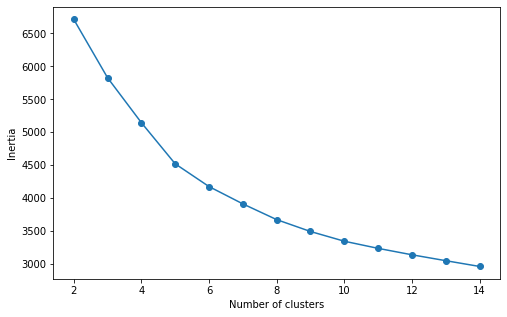

In [17]:
#Plot elbow to identify number of clusters

plt.figure(figsize=(8,5))
plt.plot(df_SSE['Cluster'], df_SSE['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Inertia --minimizing a criterion known as the inertia or within-cluster sum-of-squares. 
#Inertia is not a normalized metric: lower values are better and zero is optimal

Using a Python package, kneed, to identify the elbow point programmatically:

In [97]:
kl = KneeLocator(range(2, 15), df_SSE['Score'], curve="convex", direction="decreasing")
kl.elbow

print(f"Recommended number of optimal clusters using K-means is {kl.elbow}.")

Recommended number of optimal clusters using K-means is 6.


#### Silhouette coefficient

The silhouette coefficient is a measure of cluster cohesion and separation. 

It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [19]:
silhouette_coeff = []

for k in range(2,15): #trying different clusters
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    coefficient = silhouette_score(df_norm, km.labels_)
    silhouette_coeff.append(coefficient)
df_coeff = pd.DataFrame({'Cluster':range(2,15), 'Silhouette_coeff':silhouette_coeff})

df_coeff.sort_values("Silhouette_coeff", ascending= False)

,Cluster,Silhouette_coeff
4,6,0.244978
6,8,0.239330
5,7,0.237578
3,5,0.229224
0,2,0.227239
7,9,0.217893
8,10,0.217005
10,12,0.215949
9,11,0.214956
11,13,0.207695


In [20]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.245 
Silhouette score for 7 clusters k-means : 0.238 
Silhouette score for 8 clusters k-means : 0.239 
Silhouette score for 9 clusters k-means : 0.218 
Silhouette score for 10 clusters k-means : 0.217 


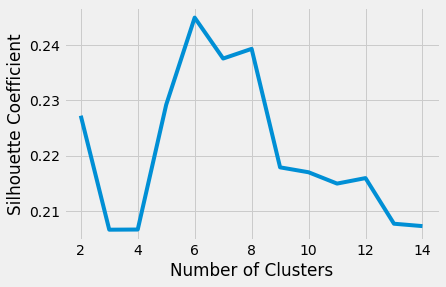

In [21]:
plt.style.use("fivethirtyeight")

plt.plot(df_coeff['Cluster'], df_coeff['Silhouette_coeff'])
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### Davies Bouldin

The minimum score is zero, with lower values indicating better clustering.

In [22]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score of number of clusters:' + str(i) + " is " +str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score of number of clusters:6 is 1.404
Davies Bouldin Score of number of clusters:7 is 1.354
Davies Bouldin Score of number of clusters:8 is 1.412


In [23]:
# final decision --> 6 clusters

In [24]:
kmeans_labels=KMeans(n_clusters=6,random_state=123).fit_predict(df_norm) #Cluster groups


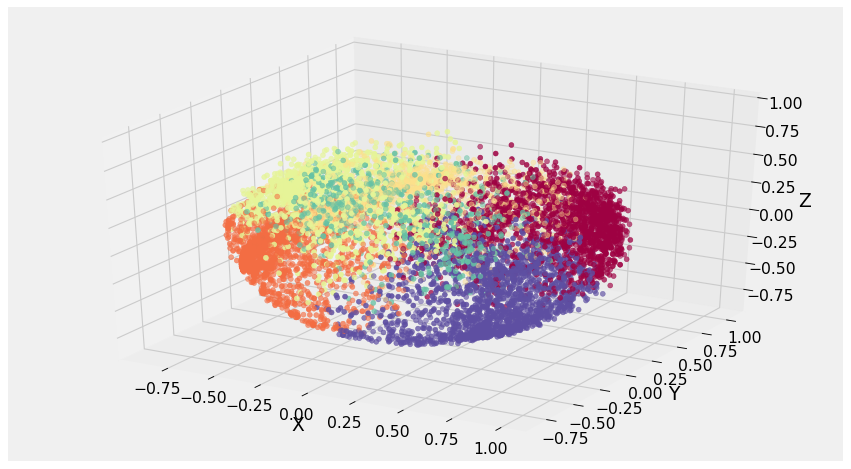

In [25]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### Hierarchical Clustering

Using dendogram to determine the n_clusters.

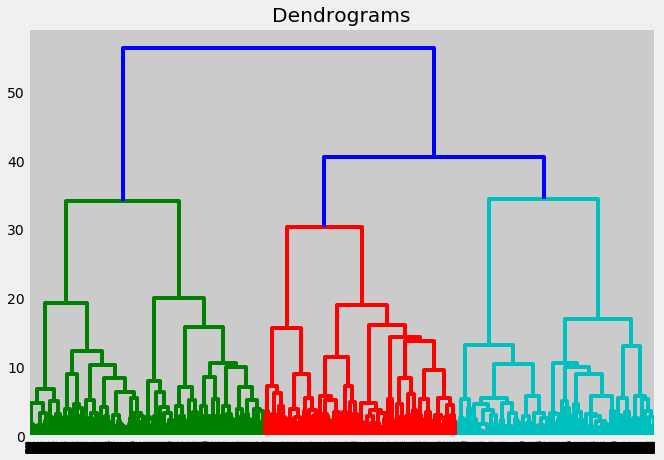

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))

In [27]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(df_norm)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(df_norm,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))

Silhouette Score for Hieararchial Clustering:0.16269232126810304
Davies Bouldin Score:2.0178566980982713


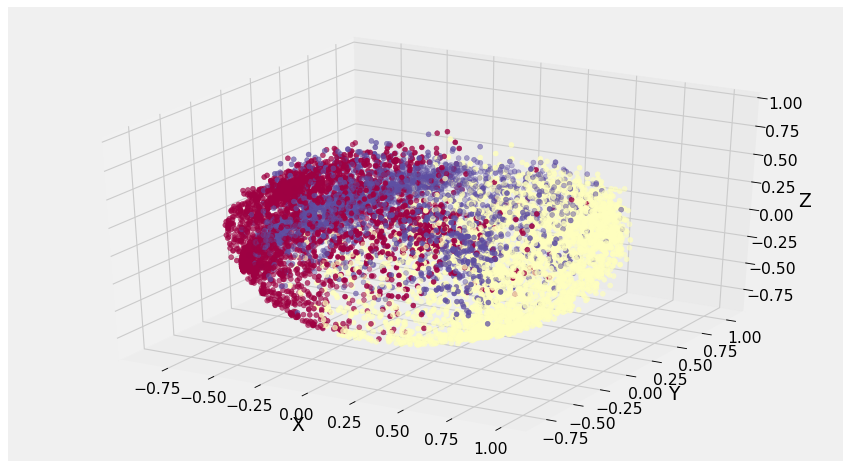

In [28]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=hcp,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### DBSCAN 

DBSCAN is a density-based clustering algorithm. 
To choose two parameters, a positive number epsilon and a natural number minPoints.

In [29]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
    for j in range(1,12):
        dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
        clusters=dbscan_cluster.fit_predict(df_norm)
        if len(np.unique(clusters))>2:
            results=results.append({'Eps':i*0.2,
                                    'Min_Samples':j,
                                    'Number of Cluster':len(np.unique(clusters)),
                                    'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                                    'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index=True)
            
            
            
            

In [30]:
results.sort_values('Silhouette Score',ascending=False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
16,0.4,6.0,3.0,-0.033530,4.460939
18,0.6,2.0,4.0,-0.046250,3.857114
14,0.4,4.0,5.0,-0.122670,3.361897
15,0.4,5.0,5.0,-0.124499,3.304983
10,0.2,11.0,18.0,-0.238821,1.344078


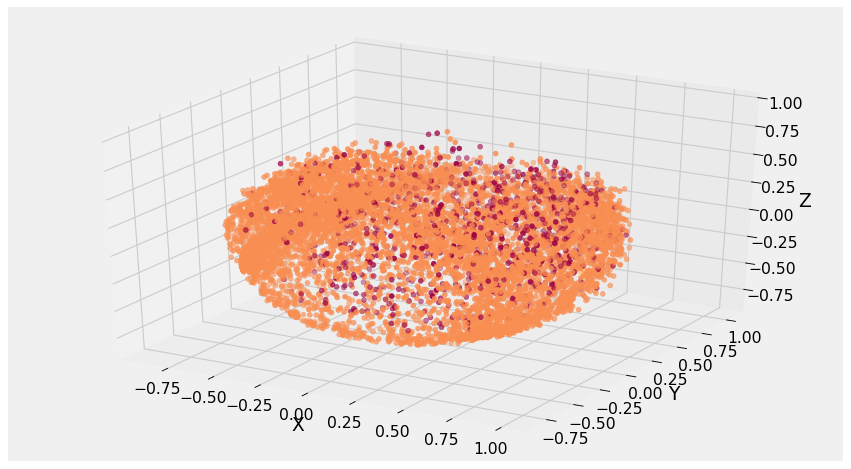

In [31]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=4)
db_clusters=dbscan_cluster.fit_predict(df_norm)

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=db_clusters,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

No effective -- lack of clarity in the cluster creation.

### GMM Algorithm

Gaussian Mixture Models (GMMs) assume there are a number of Gaussian distributions, and each of them represents a cluster.
The optimal number of clusters (k) is determined by minimizing AIC and Bayesian information criterion (BIC).

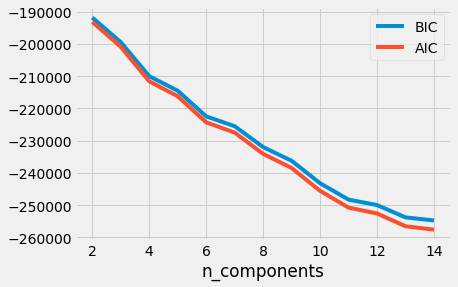

In [32]:
models = [GaussianMixture(n,covariance_type='tied', random_state=123).fit(df_norm) for n in range(2,15)]
plt.plot(range(2,15), [m.bic(df_norm) for m in models], label='BIC')
plt.plot(range(2,15), [m.aic(df_norm) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')
plt.show()

In [33]:
parameters=['full','tied','diag','spherical']
n_clusters=np.arange(1,21)
results_=pd.DataFrame(columns=['Covariance Type','Number of Cluster','Silhouette Score','Davies Bouldin Score'])
for i in parameters:
    for j in n_clusters:
        gmm_cluster=GaussianMixture(n_components=j,covariance_type=i,random_state=123)
        clusters=gmm_cluster.fit_predict(df_norm)
        if len(np.unique(clusters))>=2:
          results_=results_.append({"Covariance Type":i,'Number of Cluster':j,"Silhouette Score":metrics.silhouette_score(df_norm,clusters),
                                    'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}
                                   ,ignore_index=True)

In [34]:
display(results_.sort_values(by=["Silhouette Score"], ascending=False)[:5])

,Covariance Type,Number of Cluster,Silhouette Score,Davies Bouldin Score
57,spherical,2,0.225937,1.788465
61,spherical,6,0.223920,1.458188
19,tied,2,0.221191,1.820584
63,spherical,8,0.218563,1.421994
23,tied,6,0.210932,1.535861


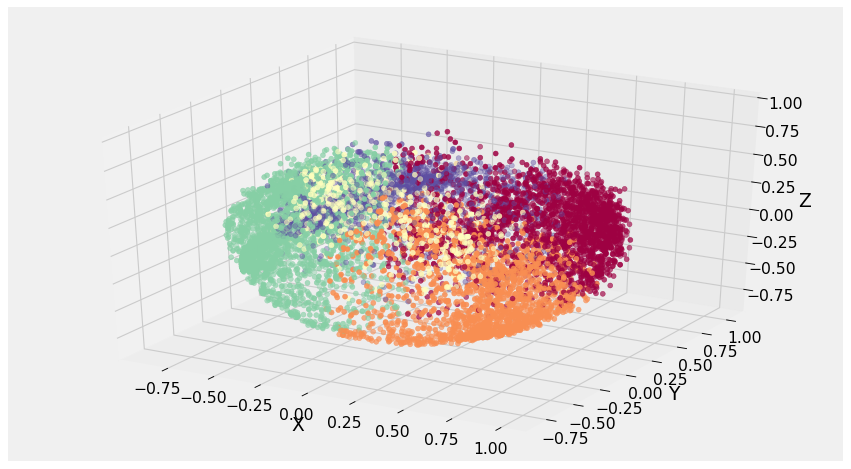

In [35]:
gmm_cluster=GaussianMixture(n_components=5,covariance_type="spherical",random_state=123)
gmm_cluster.fit(df_norm)
gmm_labels = gmm_cluster.predict(df_norm)


fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=gmm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### Comparison of results and selection of the most optimal clustering method

In [36]:
algorithms_used =["K-Means","Hierarchical Clustering","DBSCAN","Gaussian Mixture Model"]

# Silhouette Score for the different algorithms
ss =[metrics.silhouette_score(df_norm,kmeans_labels),metrics.silhouette_score(df_norm,hcp),
   metrics.silhouette_score(df_norm,db_clusters),metrics.silhouette_score(df_norm,gmm_labels)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(df_norm,kmeans_labels),metrics.davies_bouldin_score(df_norm,hcp),
   metrics.davies_bouldin_score(df_norm,db_clusters),metrics.davies_bouldin_score(df_norm,gmm_labels)]




In [39]:
df_comparison = pd.DataFrame({"Algorithms":algorithms_used,"Silhouette Score":ss, "Davies Bouldin":db})
df_comparison.sort_values(by=["Silhouette Score","Davies Bouldin"], ascending=False)



,Algorithms,Silhouette Score,Davies Bouldin
0,K-Means,0.244978,1.403619
3,Gaussian Mixture Model,0.210728,1.572907
1,Hierarchical Clustering,0.162692,2.017857
2,DBSCAN,-0.122670,3.361897


### Cluster analysis ->  Using K-Means

#### Size of the clusters

In [44]:
df['Cluster_groups']=list(kmeans_labels)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters,Cluster_groups
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,1


In [63]:
cluster_size= pd.DataFrame(df.groupby("Cluster_groups")["Cluster_groups"].count())
cluster_size= cluster_size.rename(columns= {"Cluster_groups": "Cluster_size"})
#cluster_size.T
cluster_size.sort_values(by= "Cluster_size", ascending= False)

,Cluster_size
Cluster_groups,
1,1893
5,1784
0,1750
2,1577
3,1262
4,684


#### Stats by cluster 

In [69]:
df_clusters = df.groupby("Cluster_groups").mean()
df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
Cluster_groups,,,,,,,,,,,,,,,,,,
0,1939.166678,0.975844,3292.902297,2243.562571,1049.710583,385.431008,0.887379,0.687408,0.560329,0.059822,1.294286,43.789143,6921.690909,3252.411065,978.092069,0.249019,11.913714,0.0
1,1242.027290,0.981285,198.564554,162.367227,36.408040,455.438568,0.126680,0.075943,0.050285,0.111329,1.907554,2.237718,2764.421553,763.929964,615.111225,0.015935,11.917591,1.0
2,4034.195096,0.969711,411.798833,258.529689,153.333614,3752.237915,0.243120,0.108612,0.155349,0.429941,12.250476,5.864933,6706.005842,3053.756531,1899.796054,0.034169,11.692454,2.0
3,123.720560,0.396342,354.637821,208.729263,146.143740,296.373701,0.274514,0.074773,0.192771,0.030718,0.656894,4.461173,3904.239743,1132.788161,271.969434,0.232013,11.825674,3.0
4,815.338218,0.795961,415.586667,257.634503,158.459474,1001.692579,0.422197,0.123738,0.280830,0.179681,2.942982,5.377193,2496.219955,624.455982,370.690183,0.158015,7.463450,4.0
5,662.330721,0.959876,817.825432,124.091457,694.234692,138.893754,0.884135,0.064456,0.843945,0.030505,0.582960,18.065583,3177.902059,953.653638,709.543719,0.255062,11.885090,5.0


In [71]:
df_clusters.index
df_clusters.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Clusters'],
      dtype='object')

In [67]:
#Features of interest

features= ["BALANCE","PURCHASES","BALANCE_FREQUENCY","PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","PURCHASES_TRX","CREDIT_LIMIT","TENURE"]

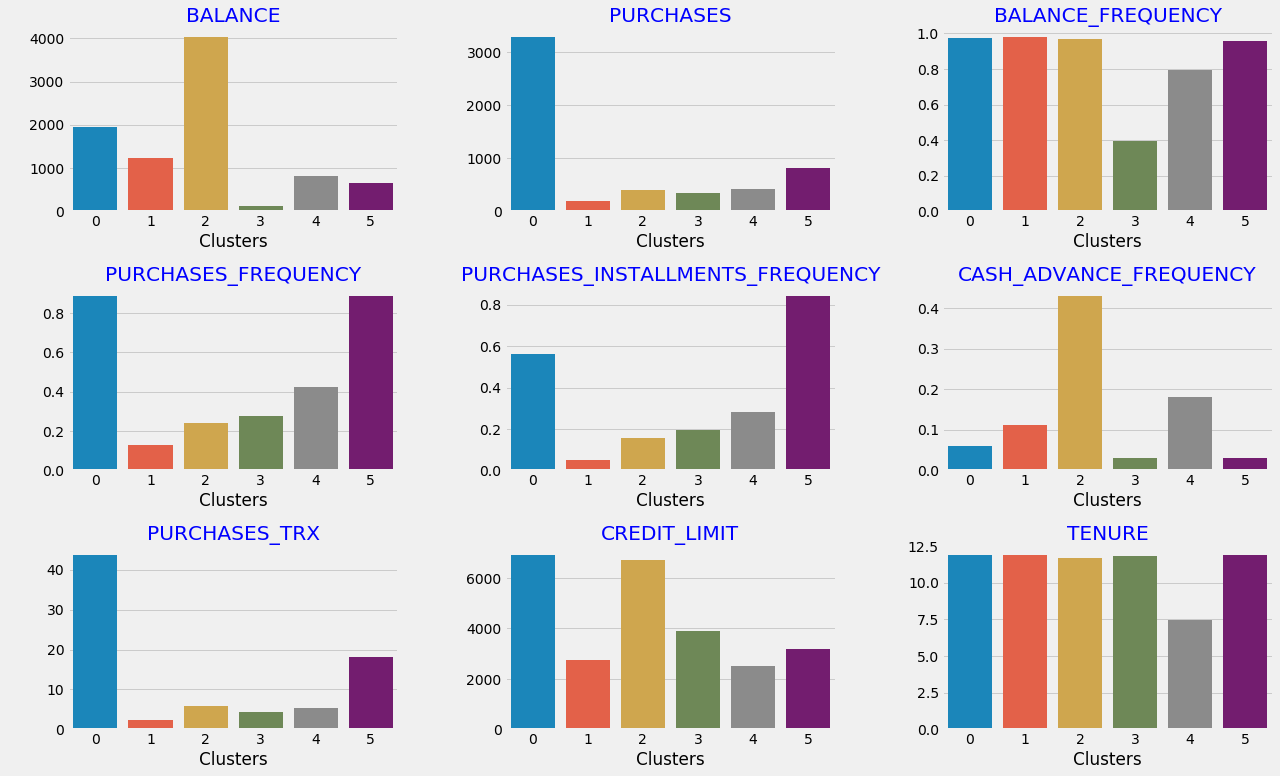

In [93]:
plt.figure(figsize=(18,11))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.barplot(df_clusters.index,df_clusters[j])
    plt.title(j, fontdict={'color':'blue'})
    plt.xlabel('Clusters')
    plt.ylabel(' ')
plt.tight_layout()
plt.show()

### Results

- Cluster 0 -> "The frequent buyers": Medium balance, very active in purchasing, update frequently their balance, high credit limit, no cash-advance. 
- Cluster 1 -> "Low usage": No active in purchases, low-credit, low-medium balance.
- Cluster 2 -> "The savers with high credit": High balance, no very active in purchases, update frequently their balance, tend to pay cash in advance, and high credit.
- Cluster 3 -> "Love credit but low balance": Low balance, balance is not updated frequently, no cash in advance, use of credit.
- Cluster 4 -> "Low-medium group": Low-medium balance, low-medium credit, low-medium purchase frequency.
- Cluster 5 -> "Low balance but active buyers - The cycle": low balance, but acttive in purchasing and updating the balance. 

--------

STAR GROUPS -> Cluster 0

PROMOTE SALES -> Cluster 2

CONTRIBUTORS -> Cluster 3, Cluster 5 --low balance but actively using credit.